<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 2</center></h3>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3, outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        
        #self.l1=None 
        #self.l2=None
        
        #weights
        
        # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W1 = np.random.rand(inputSize+1,3)
        #self.B1=np.random.rand(1)
        
        # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        
        self.W2 =np.random.rand(hiddenlayer+1,1)
        #self.B2=np.random.rand(1)
        
    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. whatever function was passed in initialization)    
        
        '''
        self.layer1 = np.dot(X,self.W1)+self.B1
        self.l1 = self.sigmoid(self.layer1)
        self.layer2 = np.dot(self.l1,self.W2)+self.B2
        self.l2 = self.sigmoid(self.layer2)
        return self.l2
        '''
        self.layer1 = np.dot(X,self.W1)
        self.l1 = self.sigmoid(self.layer1)
        
        vector_of_ones = np.ones((self.l1.shape[0],1),dtype=int)
        self.l1_s_with_bais = np.concatenate((self.l1,vector_of_ones),axis=1)
        
        self.layer2 = np.dot(self.l1_s_with_bais,self.W2)
        self.l2 = self.sigmoid(self.layer2)

        return self.l2
        

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoid_derivative(self, s):
        return s*(1-s)
    
    def tanh(self, s):
        th=np.exp(s)-np.exp(-s)/np.exp(s)+np.exp(-s)
        return th

    def tanh_derivative(self, s):
        return (1-(self.tanh(s)**2))
    
    def relu(self, s):
        return np.maximum(0, s)

    def relu_derivative(self, s):
        s[s<=0] = 0
        s[s>0] = 1
        return s

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of that applied activation function to the error
        # adjust set of weights
        
        '''0
        error1 = y_pred - Y
        td=self.relu_derivative(self.layer1)
        error2 = np.dot(td,np.dot(error1,self.W2.T))
        
        self.W2=np.dot(self.l1.T,error1)
        self.B2=error1
        self.W1=np.dot(np.dot(X.T),error2)
        self.B1=error2
        '''
        
        self.err = self.crossentropy(Y,y_pred)
        
        sig_der_err_l2 = np.dot(np.transpose(self.l1_s_with_bais),(self.sigmoid_derivative(y_pred)*(y_pred-Y)))
        sid_der_err_l2_for_l1 = (np.dot((y_pred-Y)*self.sigmoid_derivative(y_pred),np.transpose(self.W2))*self.sigmoid_derivative(self.l1_s_with_bais))
        
        sid_der_err_l2_for_l1_without_l2_baise, l2_b = np.hsplit(sid_der_err_l2_for_l1,np.array([3,]))
        sig_der_err_l1 = np.dot(np.transpose(X),sid_der_err_l2_for_l1_without_l2_baise)                      
        # adjust set of weights
        self.W1 -= lr*sig_der_err_l1
        self.W2 -= lr*sig_der_err_l2
        
        
    
    def crossentropy(self, Y, Y_pred):

        return (-sum([(Y[i]*np.log(Y_pred[i]))+((1-Y[i])*np.log(1-Y_pred[i])) for i in range(len(Y))])/len(Y)) #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
        # plot error of the model if plot_err is true
        error=[]
        validER=[]
        for i in range(epochs):
            YP=self.feedforward(trainX)
            self.backwardpropagate(trainX,trainY,YP,learningRate)
            error.append(self.crossentropy(trainY,YP))
            
            if(validationX.all !=None and validationY.all!=None):
                a=0
                count=0
                for i in range(len(validationX)):
                    yp = self.predict(validationX[i][None,:])
                    if yp < 0.5: a=0
                    if yp >= 0.5: a=1
                    if a == validationY[i]: count=count+1
                validER.append(count/len(validationX))
                
        if plot_err==True:
            plt.plot(error,label="Error")
            plt.show()
            plt.plot(validER,label="Accuracy: Validation ")
            plt.show()
            
    
            

    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        total=len(testX)
        count=0
        a=0
        
        test_acc_list = []
        for i in range(total):
            yp=self.predict(testX[i][None,:])
            if yp < 0.5: a=0
            if yp >= 0.5: a=1
            if a==int(testY[i]):
                count=count+1
        return (count/total)*100
        
       
    
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        file = open(name, 'wb')
        
        input_size=self.inputSize
        output_size=self.outputSize
        hiddenlayer=self.hiddenLayer
        w1=self.W1
        w2=self.W2
        
        model_data={
            "input_size":input_size,
            "output_size":output_size,
            "hiddenlayer":hiddenlayer,
            "w1":w1,
            "w2":w2}
        
        #model_data=[input_size,output_size,weights,bias]
        #pickle.dumps(model, file)
        file.write(pickle.dumps(model_data))
        print(model_data)
        file.close()
        print("Model saved successfully")

        
    def loadModel(self,name):
        datax = pickle.loads(open(name, "rb").read())
        
        self.inputSize=datax['input_size']
        self.outputSize=datax['output_size']
        self.hiddenLayer=datax['hiddenlayer']
        self.W1=datax['w1']
        self.W2=datax['w2']
        print(datax)
        

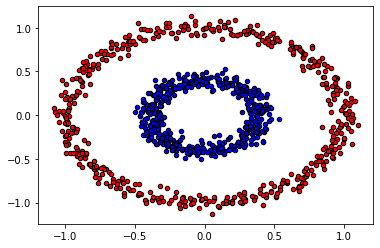

In [4]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [5]:
label=label.reshape(len(label),1)

In [6]:
vector_of_ones = np.ones((data.shape[0],1),dtype=int)
data = np.concatenate((data,vector_of_ones),axis=1)
#Note: shuffle this dataset before dividing it into three parts

td=np.concatenate((data,label),axis=1)
np.random.shuffle(td)
data,label=np.hsplit(td,np.array([3,]))
# Distribute this data into three parts i.e. training, validation and testing
trainX,testX,validX=np.split(data, [int(.6 * len(data)), int(.8 * len(data))])
trainY,testY,validY=np.split(label, [int(.6 * len(label)), int(.8 * len(label))])

In [7]:
print(trainX.shape)
print(trainY.shape)

(600, 3)
(600, 1)


In [8]:
print(trainX.shape)
print(testX.shape)
print(validX.shape)
print(trainY.shape)
print(testY.shape)
print(validY.shape)

(600, 3)
(200, 3)
(200, 3)
(600, 1)
(200, 1)
(200, 1)


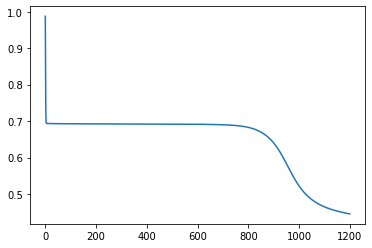

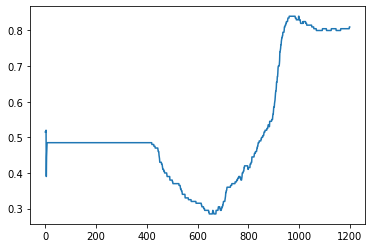

In [9]:
model = Neural_Network(2,3,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 1200, learningRate = 0.009, validationX = validX, validationY = validY)

In [10]:
model.accuracy(trainX,trainY)

84.66666666666667

In [11]:
#save the best model which you have trained, 
model.saveModel('bestmodelt2.mdl')

{'input_size': 2, 'output_size': 1, 'hiddenlayer': 3, 'w1': array([[ 2.53429296,  4.52098693,  0.69390927],
       [ 4.72555387,  3.41875001,  0.12202916],
       [ 2.8101039 , -3.06423093,  0.39108825]]), 'w2': array([[ 4.72210068],
       [-5.31659737],
       [ 0.18963373],
       [-2.73398484]])}
Model saved successfully


#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [12]:
mm = Neural_Network()
mm.loadModel('bestmodelt2.mdl')

{'input_size': 2, 'output_size': 1, 'hiddenlayer': 3, 'w1': array([[ 2.53429296,  4.52098693,  0.69390927],
       [ 4.72555387,  3.41875001,  0.12202916],
       [ 2.8101039 , -3.06423093,  0.39108825]]), 'w2': array([[ 4.72210068],
       [-5.31659737],
       [ 0.18963373],
       [-2.73398484]])}


In [13]:
acc=mm.accuracy(trainX,trainY)
print("Training Accuracy: ",acc, "%")

acc=mm.accuracy(testX,testY)
print("Testing Accuracy: ",acc, "%")

acc=mm.accuracy(validX,validY)
print("Validation Accuracy: ",acc, "%")

Training Accuracy:  84.66666666666667 %
Testing Accuracy:  87.5 %
Validation Accuracy:  81.0 %
